In [ ]:
from google.colab import files
files.upload()  # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nusratjahanshirmen","key":"1e7a592f9d60669ed79ada27bfad1f6d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s "PoliticSpeech"
!kaggle datasets list -s "political speeches bias"


No datasets found
No datasets found


In [6]:
!apt-get install fonts-noto
!apt-get install fonts-noto-unhinted
!apt-get install fonts-noto-color-emoji
!apt-get install fonts-noto-extra
!apt-get install fonts-noto-cjk
!apt-get install fonts-noto-ui-core


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra
  fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji
  fonts-noto-core fonts-noto-extra fonts-noto-mono fonts-noto-ui-core
  fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 38 not upgraded.
Need to get 317 MB of archives.
After this operation, 790 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:

In [8]:
!kaggle datasets download -d lalitnagori/synthetic-text-generated-with-nagri-fonts



403 Client Error: Forbidden for url: https://www.kaggle.com/api/v1/datasets/metadata/lalitnagori/synthetic-text-generated-with-nagri-fonts


In [9]:
!pip install kaggle


In [10]:
!kaggle datasets list -s devanagari


ref                                                       title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rishianand/devanagari-character-set                       Devanagari Character Set                          124230156  2017-11-21 10:15:09.430000           5312         97  0.7647059        
anurags397/hindi-mnist-data                               Hindi/Devanagari MNIST Data                        18064821  2025-03-18 19:34:19.210000            587         15  1.0              
ashokpant/devanagari-character-dataset                    Devanagari Character Dataset                        8644341  2018-05-07 06:57:49.150000           4167        111  0.7647059        
ashokpant/devanagari-character-dataset-large 

In [11]:
!kaggle datasets download -d rishianand/devanagari-character-set


Dataset URL: https://www.kaggle.com/datasets/rishianand/devanagari-character-set
License(s): CC0-1.0
  0% 0.00/118M [00:00<?, ?B/s]
100% 118M/118M [00:00<00:00, 1.43GB/s]


In [12]:
!unzip devanagari-character-set.zip -d devanagari_data


Streaming output truncated to the last 5000 lines.
  inflating: devanagari_data/Images/Images/digit_7/56662.png  
  inflating: devanagari_data/Images/Images/digit_7/56663.png  
  inflating: devanagari_data/Images/Images/digit_7/56664.png  
  inflating: devanagari_data/Images/Images/digit_7/56665.png  
  inflating: devanagari_data/Images/Images/digit_7/56666.png  
  inflating: devanagari_data/Images/Images/digit_7/56667.png  
  inflating: devanagari_data/Images/Images/digit_7/56668.png  
  inflating: devanagari_data/Images/Images/digit_7/56669.png  
  inflating: devanagari_data/Images/Images/digit_7/56670.png  
  inflating: devanagari_data/Images/Images/digit_7/56671.png  
  inflating: devanagari_data/Images/Images/digit_7/56672.png  
  inflating: devanagari_data/Images/Images/digit_7/56673.png  
  inflating: devanagari_data/Images/Images/digit_7/56674.png  
  inflating: devanagari_data/Images/Images/digit_7/56675.png  
  inflating: devanagari_data/Images/Images/digit_7/56676.png  
  in

In [14]:
!ls devanagari_data


data.csv  Images


In [15]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("devanagari_data/data.csv")

# Show first few rows
df.head()


,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [16]:
df.columns[:10]


Index(['pixel_0000', 'pixel_0001', 'pixel_0002', 'pixel_0003', 'pixel_0004',
       'pixel_0005', 'pixel_0006', 'pixel_0007', 'pixel_0008', 'pixel_0009'],
      dtype='object')

In [17]:
# Separate label and image pixels
X = df.drop("label", axis=1).values
y = df["label"].values

# Check shapes
print("X shape:", X.shape)
print("y shape:", y.shape)


KeyError: "['label'] not found in axis"

In [18]:
df.columns[:10]


Index(['pixel_0000', 'pixel_0001', 'pixel_0002', 'pixel_0003', 'pixel_0004',
       'pixel_0005', 'pixel_0006', 'pixel_0007', 'pixel_0008', 'pixel_0009'],
      dtype='object')

In [19]:
X = df.drop("character", axis=1).values
y = df["character"].values


In [20]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


TypeError: Image data of dtype object cannot be converted to float

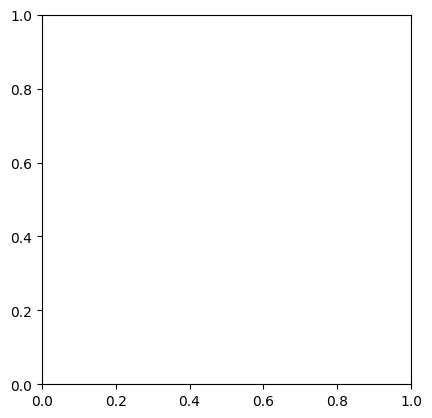

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# reshape X to (num_samples, 32, 32)
X_reshaped = X.reshape(-1, 32, 32)

# show one random example
i = np.random.randint(0, len(X_reshaped))
plt.imshow(X_reshaped[i], cmap='gray')
plt.title(f"Label: {y[i]}")
plt.axis('off')
plt.show()


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# convert pixel values to numeric
X = X.astype(np.float32)

# reshape to 32x32
X_reshaped = X.reshape(-1, 32, 32)

# show one random example
i = np.random.randint(0, len(X_reshaped))
plt.imshow(X_reshaped[i], cmap='gray')
plt.title(f"Label: {y[i]}")
plt.axis('off')
plt.show()


ValueError: could not convert string to float: 'character_01_ka'

In [23]:
import cv2
import os
import numpy as np

data_dir = "data/"   # path to your dataset
X = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale
        img = cv2.resize(img, (32, 32))                   # resize
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)


FileNotFoundError: [Errno 2] No such file or directory: 'data/'

In [24]:
import os
print(os.getcwd())


/content


In [25]:
!ls /content


devanagari-character-set.zip  devanagari_data  kaggle.json  sample_data


In [26]:
data_dir = "/content/devanagari_data"

X = []
y = []

import os
import cv2
import numpy as np

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale
        img = cv2.resize(img, (32, 32))  # resize to 32x32
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)


NotADirectoryError: [Errno 20] Not a directory: '/content/devanagari_data/data.csv'

In [27]:
!ls /content/devanagari_data | head


data.csv
Images


In [28]:
data_dir = "/content/devanagari_data/Images"

X = []
y = []

import os
import cv2
import numpy as np

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # read as grayscale
        img = cv2.resize(img, (32, 32))  # resize to 32x32
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [29]:
print(X.shape, y.shape)


AttributeError: 'list' object has no attribute 'shape'

In [30]:
import os
import cv2
import numpy as np

data_dir = "/content/devanagari_data/Images"

X = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue  # skip if not a directory

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue  # skip if image not read properly

        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)
print("✅ Loaded successfully!")
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_7
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_1
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_4
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_16_tabala
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_30_motosaw
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_05_kna
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_35_tra
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_33_ha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_09_jha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_02_kha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_28_la
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_12_thaa
⚠

In [32]:
data_dir = "/content/devanagari_data"


In [33]:
import os
import cv2
import numpy as np

data_dir = "/content/devanagari_data/Images"

X = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue

        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(label)

X = np.array(X, dtype=np.float32)
y = np.array(y)
print("✅ Loaded successfully!")
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_7
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_1
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_4
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_16_tabala
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_30_motosaw
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_05_kna
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_35_tra
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_33_ha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_09_jha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_02_kha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_28_la
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_12_thaa
⚠

In [34]:
!ls -R /content/devanagari_data | head -n 50


/content/devanagari_data:
data.csv
Images

/content/devanagari_data/Images:
Images

/content/devanagari_data/Images/Images:
character_01_ka
character_02_kha
character_03_ga
character_04_gha
character_05_kna
character_06_cha
character_07_chha
character_08_ja
character_09_jha
character_10_yna
character_11_taamatar
character_12_thaa
character_13_daa
character_14_dhaa
character_15_adna
character_16_tabala
character_17_tha
character_18_da
character_19_dha
character_20_na
character_21_pa
character_22_pha
character_23_ba
character_24_bha
character_25_ma
character_26_yaw
character_27_ra
character_28_la
character_29_waw
character_30_motosaw
character_31_petchiryakha
character_32_patalosaw
character_33_ha
character_34_chhya
character_35_tra
character_36_gya
digit_0
digit_1
digit_2
digit_3
digit_4
digit_5


In [35]:
data_dir = "/content/devanagari_data/Images"


In [36]:
X = []
y = []

import os
import cv2

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue
        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(label)

import numpy as np
X = np.array(X)
y = np.array(y)

print("✅ Loaded successfully!")
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_7
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_1
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_4
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_16_tabala
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_30_motosaw
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_05_kna
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_35_tra
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_33_ha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_09_jha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_02_kha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_28_la
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_12_thaa
⚠

In [37]:
Data shape: (92000, 32, 32)
Labels shape: (92000,)


SyntaxError: invalid syntax (ipython-input-3501299614.py, line 1)

In [38]:
import os
import cv2
import numpy as np

data_dir = "/content/devanagari_data/Images"  # ✅ correct path

X = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue
        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Loaded successfully!")
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_7
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_1
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/digit_4
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_16_tabala
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_30_motosaw
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_05_kna
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_35_tra
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_33_ha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_09_jha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_02_kha
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_28_la
⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images/character_12_thaa
⚠

In [40]:
data_dir = "/content/devanagari_data"


In [42]:
import os
import cv2
import numpy as np

X = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue
        img = cv2.resize(img, (32, 32))
        X.append(img)
        y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ Loaded successfully!")
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


⚠️ Skipping unreadable file: /content/devanagari_data/Images/Images
✅ Loaded successfully!
Data shape: (0,)
Labels shape: (0,)


In [43]:
data_dir = "/content/devanagari_data/Images"


In [44]:
!ls /content/devanagari_data
!ls /content/devanagari_data/Images



data.csv  Images
Images


In [51]:
data_dir = "/content/devanagari_data/Images/Images"


In [52]:
print(data_dir)


/content/devanagari_data/Images/Images


In [53]:
!ls /content/devanagari_data/Images/Images


character_01_ka        character_13_daa     character_25_ma	       digit_0
character_02_kha       character_14_dhaa    character_26_yaw	       digit_1
character_03_ga        character_15_adna    character_27_ra	       digit_2
character_04_gha       character_16_tabala  character_28_la	       digit_3
character_05_kna       character_17_tha     character_29_waw	       digit_4
character_06_cha       character_18_da	    character_30_motosaw       digit_5
character_07_chha      character_19_dha     character_31_petchiryakha  digit_6
character_08_ja        character_20_na	    character_32_patalosaw     digit_7
character_09_jha       character_21_pa	    character_33_ha	       digit_8
character_10_yna       character_22_pha     character_34_chhya	       digit_9
character_11_taamatar  character_23_ba	    character_35_tra
character_12_thaa      character_24_bha     character_36_gya


In [54]:
data_dir = "/content/devanagari_data/Images/Images"


In [55]:
import os
import cv2
import numpy as np

x = []
y = []

for label in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label)
    if not os.path.isdir(folder_path):
        continue
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"⚠️ Skipping unreadable file: {img_path}")
            continue
        img = cv2.resize(img, (32, 32))
        x.append(img)
        y.append(label)

x = np.array(x)
y = np.array(y)

print("✅ Loaded successfully!")
print("Data shape:", x.shape)
print("Labels shape:", y.shape)


✅ Loaded successfully!
Data shape: (92000, 32, 32)
Labels shape: (92000,)


In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Normalize image data
x = x / 255.0
x = x.reshape(-1, 32, 32, 1)  # add channel dimension

# Encode labels to numeric form
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

print("✅ Preprocessing complete!")
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)
print("Unique classes:", len(np.unique(y_encoded)))


✅ Preprocessing complete!
Train shape: (73600, 32, 32, 1)
Test shape: (18400, 32, 32, 1)
Unique classes: 46


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),

    Dense(256, activation='relu'),
    Dropo


SyntaxError: incomplete input (ipython-input-2586013540.py, line 17)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')  # 46 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_data=(x_test, y_test)
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,038 (2.40 MB)

 Trainable params: 629,038 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 109s 91ms/step - accuracy: 0.5780 - loss: 1.5455 - val_accuracy: 0.9476 - val_loss: 0.1709
Epoch 2/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.9244 - loss: 0.2522 - val_accuracy: 0.9661 - val_loss: 0.1080
Epoch 3/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 98s 85ms/step - accuracy: 0.9531 - loss: 0.1506 - val_accuracy: 0.9733 - val_loss: 0.0813
Epoch 4/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 99s 86ms/step - accuracy: 0.9646 - loss: 0.1121 - val_accuracy: 0.9776 - val_loss: 0.0729
Epoch 5/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 102s 89ms/step - accuracy: 0.9726 - loss: 0.0850 - val_accuracy: 0.9792 - val_loss: 0.0708
Epoch 6/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 98s 85ms/step - accuracy: 0.9761 - loss: 0.0751 - val_accuracy: 0.9820 - val_loss: 0.0660
Epoch 7/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 146s 89ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9831 - val_loss: 0.0585
Epoch 8/15
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 139s 86ms/step - accuracy: 0.9

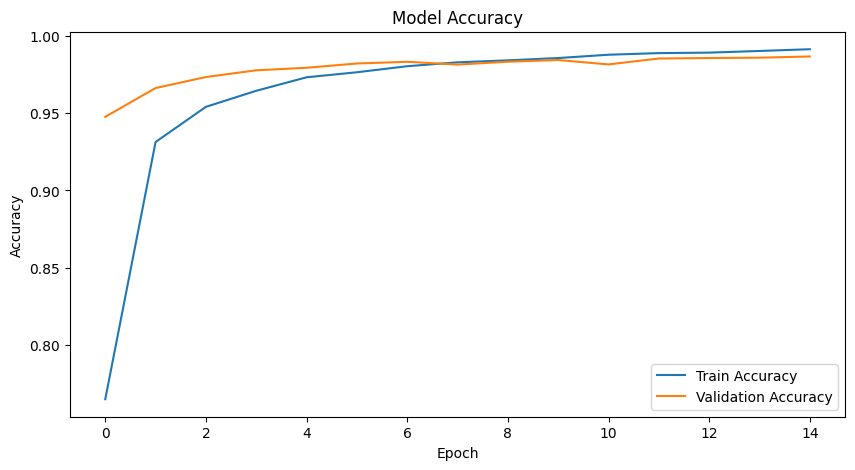

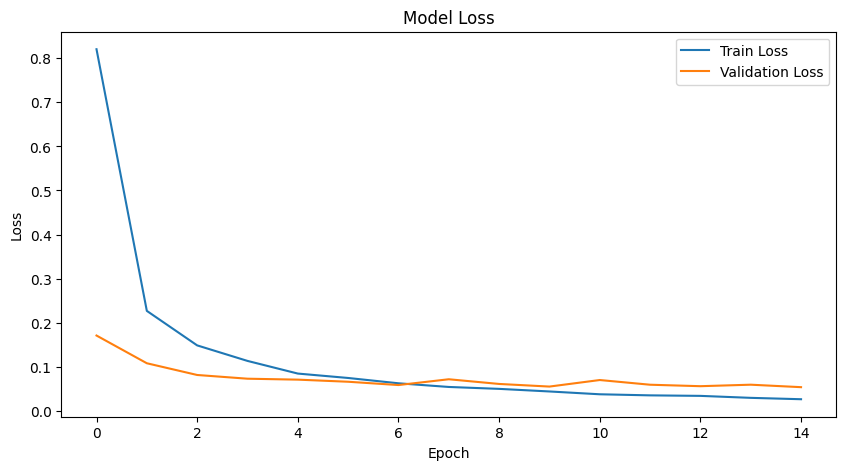

575/575 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9851 - loss: 0.0563
✅ Final Test Accuracy: 0.9865


In [59]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate final performance
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Final Test Accuracy: {test_acc:.4f}")
